In [35]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import mytk # My toolkit
import acquire

**Note: When resampling data, use a `mean()` aggregation method.**

### Store Item Demand
Load your store item demand data using your acquire and/or prepare functions.
1. Using a human-based approach, split your dataset into train and test sets.
2. Visualize your train-test split.



In [36]:
df = acquire.wrangle_zgulde()
df.head()

,item,sale_amount,sale_id,store,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,1,10.92
2013-01-01,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,1,218.40
2013-01-01,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,1,125.55
2013-01-01,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,1,1,453.60
2013-01-01,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,1,1,294.00


In [37]:
df.index.max(), df.index.min()

(Timestamp('2017-12-31 00:00:00'), Timestamp('2013-01-01 00:00:00'))

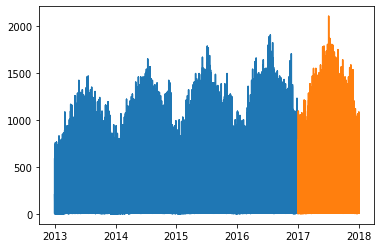

In [38]:
train = df.loc[:'2016'] # includes 2016
test = df.loc['2017']

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

In [39]:
pd.options.display.max_columns = 15
train.groupby(['item_brand','sale_date']).mean()

item  sale_amount   sale_id  store  item_price  \
item_brand       sale_date                                                    
Ahold            2013-01-01  10.0         37.8  172558.0    5.5        3.17   
                 2013-01-02  10.0         39.7  172559.0    5.5        3.17   
                 2013-01-03  10.0         38.8  172560.0    5.5        3.17   
                 2013-01-04  10.0         46.2  172561.0    5.5        3.17   
                 2013-01-05  10.0         44.9  172562.0    5.5        3.17   
...                           ...          ...       ...    ...         ...   
Zhenas Gypsy Tea 2016-12-27  31.0         47.5  557474.0    5.5        4.21   
                 2016-12-28  31.0         44.1  557475.0    5.5        4.21   
                 2016-12-29  31.0         47.8  557476.0    5.5        4.21   
                 2016-12-30  31.0         47.1  557477.0    5.5        4.21   
                 2016-12-31  31.0         57.8  557478.0    5.5        4.21   

                               item_upc12    item_upc14  store_zipcode  month  \
item_brand       sale_date                                                      
Ahold            2013-01-01  6.882671e+11  6.882671e+11        78224.8    1.0   
                 2013-01-02  6.882671e+11  6.882671e+11        78224.8    1.0   
                 2013-01-03  6.882671e+11  6.882671e+11        78224.8    1.0   
                 2013-01-04  6.882671e+11  6.882671e+11        78224.8    1.0   
                 2013-01-05  6.882671e+11  6.882671e+11        78224.8    1.0   
...                                   ...           ...            ...    ...   
Zhenas Gypsy Tea 2016-12-27  6.527901e+11  6.527901e+11        78224.8   12.0   
                 2016-12-28  6.527901e+11  6.527901e+11        78224.8   12.0   
                 2016-12-29  6.527901e+11  6.527901e+11        78224.8   12.0   
                 2016-12-30  6.527901e+11  6.527901e+11        78224.8   12.0   
                 2016-12-31  6.527901e+11  6.527901e+11        78224.8   12.0   

                             day_of_week  sales_total  
item_brand       sale_date                             
Ahold            2013-01-01          1.0      119.826  
                 2013-01-02          2.0      125.849  
                 2013-01-03          3.0      122.996  
                 2013-01-04          4.0      146.454  
                 2013-01-05          5.0      142.333  
...                                  ...          ...  
Zhenas Gypsy Tea 2016-12-27          1.0      199.975  
                 2016-12-28          2.0      185.661  
                 2016-12-29          3.0      201.238  
                 2016-12-30          4.0      198.291  
                 2016-12-31          5.0      243.338  

[71589 rows x 11 columns]

In [40]:
len(train.item_brand.value_counts())

49

In [41]:
temp = train.groupby(['sale_date', 'item_brand']).mean()
temp

item  sale_amount   sale_id  store  item_price  \
sale_date  item_brand                                                           
2013-01-01 Ahold               10.0         37.8  172558.0    5.5        3.17   
           Amys                40.0         17.9  720358.0    5.5        0.60   
           Back To Nature       5.0          8.3   81258.0    5.5        2.61   
           Barefoot            32.0         23.7  574278.0    5.5        0.68   
           Bear Naked          47.0         11.6  848178.0    5.5        7.38   
...                             ...          ...       ...    ...         ...   
2016-12-31 Triaminic           26.0         43.8  466178.0    5.5        0.98   
           Twinings Of London   7.0         51.5  119238.0    5.5        9.64   
           Usda Produce        24.0         61.1  429658.0    5.5        6.57   
           Van De Kamps         9.0         45.7  155758.0    5.5        1.79   
           Zhenas Gypsy Tea    31.0         57.8  557478.0    5.5        4.21   

                                 item_upc12    item_upc14  store_zipcode  \
sale_date  item_brand                                                      
2013-01-01 Ahold               6.882671e+11  6.882671e+11        78224.8   
           Amys                4.227201e+10  4.227201e+10        78224.8   
           Back To Nature      7.592831e+11  7.592831e+11        78224.8   
           Barefoot            8.500005e+09  8.500005e+09        78224.8   
           Bear Naked          8.846237e+11  8.846237e+11        78224.8   
...                                     ...           ...            ...   
2016-12-31 Triaminic           3.004363e+11  3.004363e+11        78224.8   
           Twinings Of London  7.017715e+10  7.017715e+10        78224.8   
           Usda Produce        4.616080e+11  4.616080e+11        78224.8   
           Van De Kamps        1.960092e+10  1.960092e+10        78224.8   
           Zhenas Gypsy Tea    6.527901e+11  6.527901e+11        78224.8   

                               month  day_of_week  sales_total  
sale_date  item_brand                                           
2013-01-01 Ahold                 1.0          1.0      119.826  
           Amys                  1.0          1.0       10.740  
           Back To Nature        1.0          1.0       21.663  
           Barefoot              1.0          1.0       16.116  
           Bear Naked            1.0          1.0       85.608  
...                              ...          ...          ...  
2016-12-31 Triaminic            12.0          5.0       42.924  
           Twinings Of London   12.0          5.0      496.460  
           Usda Produce         12.0          5.0      419.097  
           Van De Kamps         12.0          5.0       81.803  
           Zhenas Gypsy Tea     12.0          5.0      243.338  

[71589 rows x 11 columns]

In [42]:
temp.reset_index()

,sale_date,item_brand,item,sale_amount,sale_id,store,item_price,item_upc12,item_upc14,store_zipcode,month,day_of_week,sales_total
0,2013-01-01,Ahold,10.0,37.8,172558.0,5.5,3.17,6.882671e+11,6.882671e+11,78224.8,1.0,1.0,119.826
1,2013-01-01,Amys,40.0,17.9,720358.0,5.5,0.60,4.227201e+10,4.227201e+10,78224.8,1.0,1.0,10.740
2,2013-01-01,Back To Nature,5.0,8.3,81258.0,5.5,2.61,7.592831e+11,7.592831e+11,78224.8,1.0,1.0,21.663
3,2013-01-01,Barefoot,32.0,23.7,574278.0,5.5,0.68,8.500005e+09,8.500005e+09,78224.8,1.0,1.0,16.116
4,2013-01-01,Bear Naked,47.0,11.6,848178.0,5.5,7.38,8.846237e+11,8.846237e+11,78224.8,1.0,1.0,85.608
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71584,2016-12-31,Triaminic,26.0,43.8,466178.0,5.5,0.98,3.004363e+11,3.004363e+11,78224.8,12.0,5.0,42.924
71585,2016-12-31,Twinings Of London,7.0,51.5,119238.0,5.5,9.64,7.017715e+10,7.017715e+10,78224.8,12.0,5.0,496.460
71586,2016-12-31,Usda Produce,24.0,61.1,429658.0,5.5,6.57,4.616080e+11,4.616080e+11,78224.8,12.0,5.0,419.097
71587,2016-12-31,Van De Kamps,9.0,45.7,155758.0,5.5,1.79,1.960092e+10,1.960092e+10,78224.8,12.0,5.0,81.803


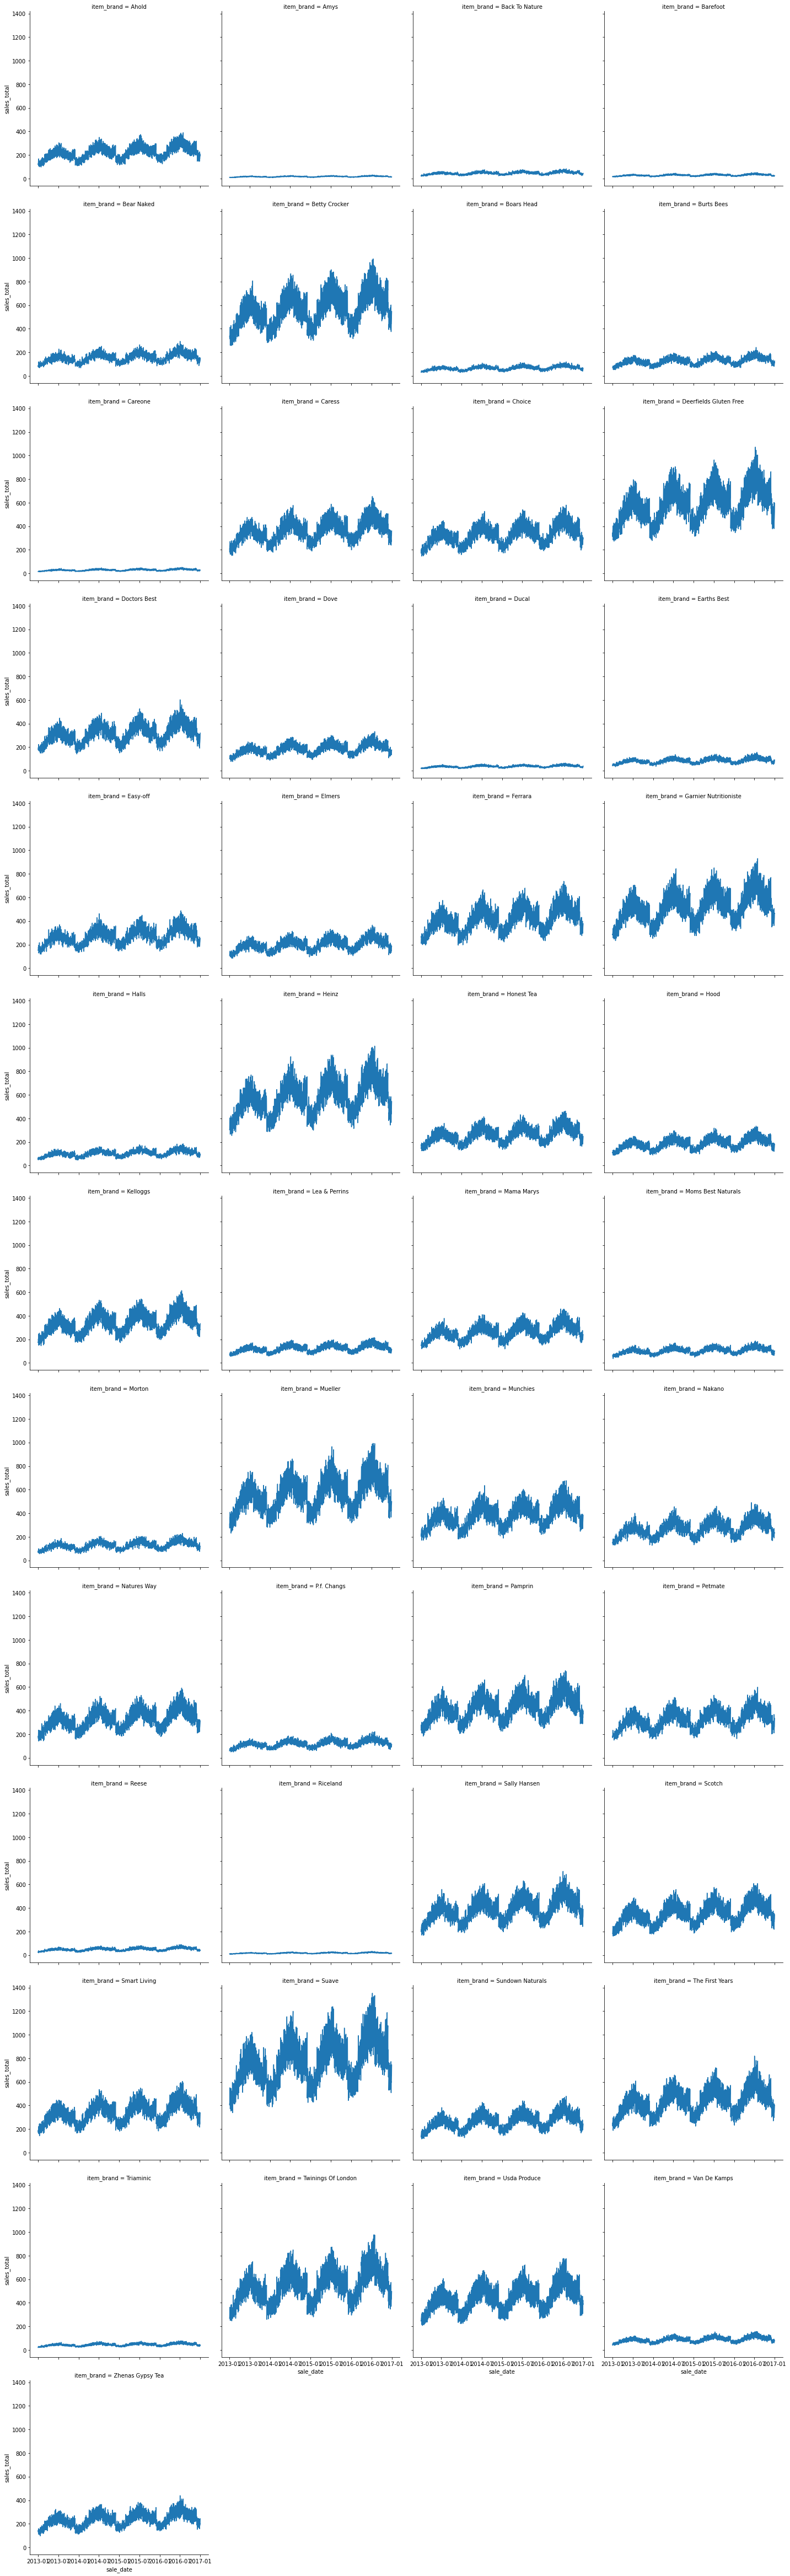

In [43]:
sns.relplot(kind='line', data=temp.reset_index(), x='sale_date', y='sales_total', col='item_brand', col_wrap=4)

In [44]:
train.groupby(['sale_date', 'item_brand']).mean().reset_index()

,sale_date,item_brand,item,sale_amount,sale_id,store,item_price,item_upc12,item_upc14,store_zipcode,month,day_of_week,sales_total
0,2013-01-01,Ahold,10.0,37.8,172558.0,5.5,3.17,6.882671e+11,6.882671e+11,78224.8,1.0,1.0,119.826
1,2013-01-01,Amys,40.0,17.9,720358.0,5.5,0.60,4.227201e+10,4.227201e+10,78224.8,1.0,1.0,10.740
2,2013-01-01,Back To Nature,5.0,8.3,81258.0,5.5,2.61,7.592831e+11,7.592831e+11,78224.8,1.0,1.0,21.663
3,2013-01-01,Barefoot,32.0,23.7,574278.0,5.5,0.68,8.500005e+09,8.500005e+09,78224.8,1.0,1.0,16.116
4,2013-01-01,Bear Naked,47.0,11.6,848178.0,5.5,7.38,8.846237e+11,8.846237e+11,78224.8,1.0,1.0,85.608
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71584,2016-12-31,Triaminic,26.0,43.8,466178.0,5.5,0.98,3.004363e+11,3.004363e+11,78224.8,12.0,5.0,42.924
71585,2016-12-31,Twinings Of London,7.0,51.5,119238.0,5.5,9.64,7.017715e+10,7.017715e+10,78224.8,12.0,5.0,496.460
71586,2016-12-31,Usda Produce,24.0,61.1,429658.0,5.5,6.57,4.616080e+11,4.616080e+11,78224.8,12.0,5.0,419.097
71587,2016-12-31,Van De Kamps,9.0,45.7,155758.0,5.5,1.79,1.960092e+10,1.960092e+10,78224.8,12.0,5.0,81.803


In [45]:
train.head()

,item,sale_amount,sale_id,store,item_brand,item_name,item_price,...,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,...,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,1,10.92
2013-01-01,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,...,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,1,218.40
2013-01-01,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,...,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,1,125.55
2013-01-01,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,...,15000 San Pedro Ave,San Antonio,TX,78232,1,1,453.60
2013-01-01,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,...,735 SW Military Dr,San Antonio,TX,78221,1,1,294.00


In [46]:
temp = train.groupby(['sale_date', 'item_brand']).size().reset_index().rename({0:'sales'}, axis=1)
temp

,sale_date,item_brand,sales
0,2013-01-01,Ahold,10
1,2013-01-01,Amys,10
2,2013-01-01,Back To Nature,10
3,2013-01-01,Barefoot,10
4,2013-01-01,Bear Naked,10
...,...,...,...
71584,2016-12-31,Triaminic,10
71585,2016-12-31,Twinings Of London,10
71586,2016-12-31,Usda Produce,20
71587,2016-12-31,Van De Kamps,10


In [47]:
train.groupby(['item_brand', 'item_name']).count()

,,item,sale_amount,sale_id,store,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
item_brand,item_name,,,,,,,,,,,,,,
Ahold,Ahold Cocoa Almonds,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610
Amys,Amys Light & Lean Spaghetti Italiano,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610
Back To Nature,Back To Nature Gluten Free White Cheddar Rice Thin Crackers,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610
Barefoot,Barefoot Pinot Grigio 187,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610
Bear Naked,Bear Naked Fit Almond Crisp 100 Percent Natural Energy Cereal,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610
Betty Crocker,Betty Crocker Twin Pack Real Potatoes Scalloped 2 Pouches For 2 Meals - 2 Pk,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610
Boars Head,Boars Head Sliced White American Cheese - 120 Ct,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610
Burts Bees,Burts Bees Daily Moisturizing Cream Sensitive,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610
Careone,Careone Family Comb Set - 8 Ct,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610


In [48]:
train[train.item_brand =='Riceland'].head(11) 

,item,sale_amount,sale_id,store,item_brand,item_name,item_price,...,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,...,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,1,10.92
2013-01-01,1,10.0,5479,4,Riceland,Riceland American Jazmine Rice,0.84,...,516 S Flores St,San Antonio,TX,78204,1,1,8.40
2013-01-01,1,11.0,7305,5,Riceland,Riceland American Jazmine Rice,0.84,...,1520 Austin Hwy,San Antonio,TX,78218,1,1,9.24
2013-01-01,1,20.0,9131,6,Riceland,Riceland American Jazmine Rice,0.84,...,1015 S WW White Rd,San Antonio,TX,78220,1,1,16.80
2013-01-01,1,7.0,10957,7,Riceland,Riceland American Jazmine Rice,0.84,...,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,1,5.88
2013-01-01,1,16.0,12783,8,Riceland,Riceland American Jazmine Rice,0.84,...,15000 San Pedro Ave,San Antonio,TX,78232,1,1,13.44
2013-01-01,1,11.0,14609,9,Riceland,Riceland American Jazmine Rice,0.84,...,735 SW Military Dr,San Antonio,TX,78221,1,1,9.24
2013-01-01,1,14.0,16435,10,Riceland,Riceland American Jazmine Rice,0.84,...,8503 NW Military Hwy,San Antonio,TX,78231,1,1,11.76
2013-01-01,1,19.0,3653,3,Riceland,Riceland American Jazmine Rice,0.84,...,2118 Fredericksburg Rdj,San Antonio,TX,78201,1,1,15.96


In [49]:
temp= train.groupby([pd.Grouper(freq='W'),'item_name', ]).sum().sale_amount.reset_index()
temp

,sale_date,item_name,sale_amount
0,2013-01-06,Ahold Cocoa Almonds,2604.0
1,2013-01-06,Amys Light & Lean Spaghetti Italiano,1039.0
2,2013-01-06,Back To Nature Gluten Free White Cheddar Rice Thin Crackers,593.0
3,2013-01-06,Barefoot Pinot Grigio 187,1496.0
4,2013-01-06,Bear Naked Fit Almond Crisp 100 Percent Natural Energy Cereal,762.0
...,...,...,...
10445,2017-01-01,Tomy The First Years Gumdrop Orthodontic Pacifiers 6m+ - 2ct,3280.0
10446,2017-01-01,Triaminic Syrup Night Time Cold & Cough Grape 4oz,2246.0
10447,2017-01-01,Twinings Of London Classics Lady Grey Tea - 20 Ct,2718.0
10448,2017-01-01,Van De Kamps Fillets Beer Battered - 10 Ct,2379.0


In [50]:
temp = temp.set_index('sale_date')

In [51]:
temp

,item_name,sale_amount
sale_date,,
2013-01-06,Ahold Cocoa Almonds,2604.0
2013-01-06,Amys Light & Lean Spaghetti Italiano,1039.0
2013-01-06,Back To Nature Gluten Free White Cheddar Rice Thin Crackers,593.0
2013-01-06,Barefoot Pinot Grigio 187,1496.0
2013-01-06,Bear Naked Fit Almond Crisp 100 Percent Natural Energy Cereal,762.0
...,...,...
2017-01-01,Tomy The First Years Gumdrop Orthodontic Pacifiers 6m+ - 2ct,3280.0
2017-01-01,Triaminic Syrup Night Time Cold & Cough Grape 4oz,2246.0
2017-01-01,Twinings Of London Classics Lady Grey Tea - 20 Ct,2718.0


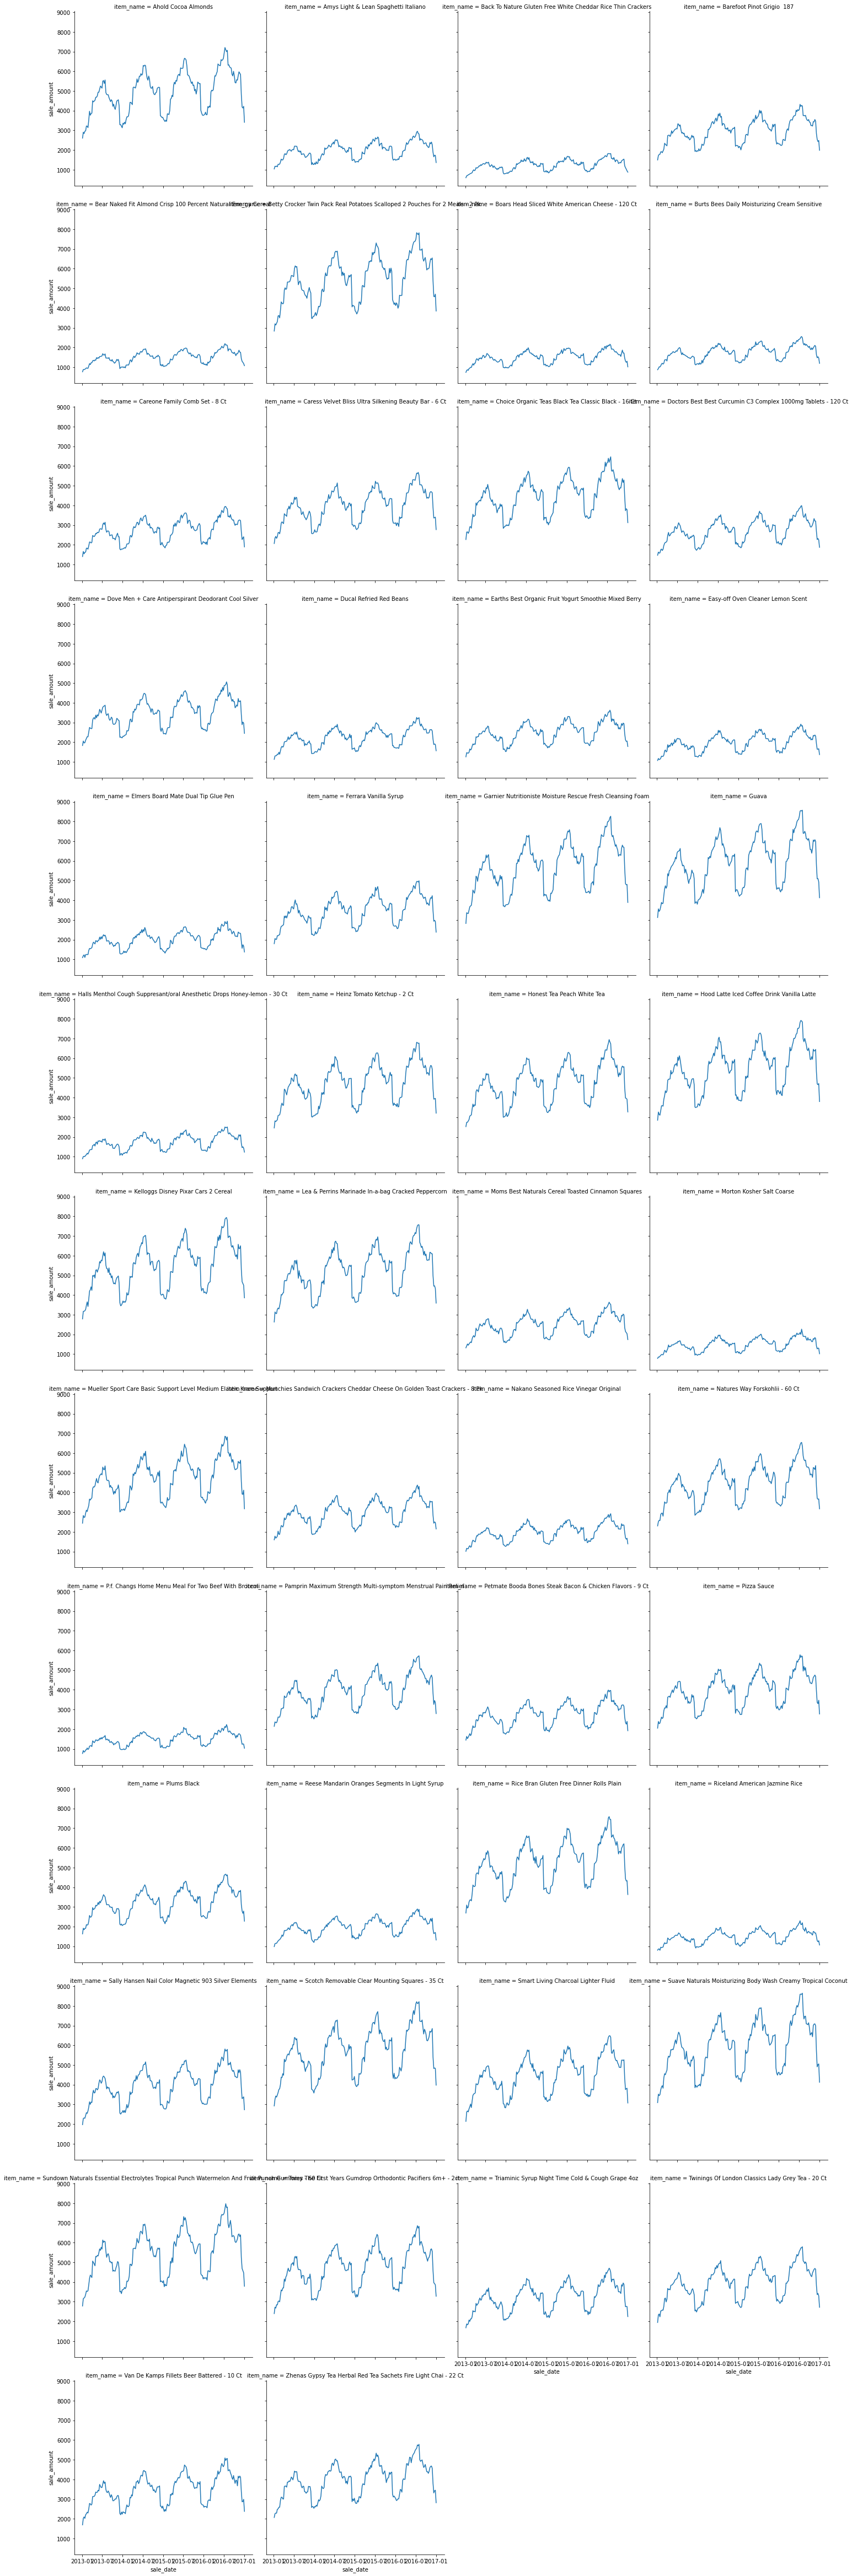

In [52]:
sns.relplot(kind='line', data=temp, x='sale_date', y='sale_amount', col='item_name', col_wrap=4)

## Seasonality

In [53]:
temp['cat'] = temp.item_name.astype('category').cat.codes
temp.head()

,item_name,sale_amount,cat
sale_date,,,
2013-01-06,Ahold Cocoa Almonds,2604.0,0
2013-01-06,Amys Light & Lean Spaghetti Italiano,1039.0,1
2013-01-06,Back To Nature Gluten Free White Cheddar Rice Thin Crackers,593.0,2
2013-01-06,Barefoot Pinot Grigio 187,1496.0,3
2013-01-06,Bear Naked Fit Almond Crisp 100 Percent Natural Energy Cereal,762.0,4


In [54]:
cat0 = temp[temp.cat == 0]


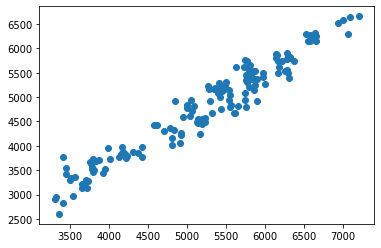

In [56]:
plt.scatter(cat0.sale_amount, cat0.shift(52).sale_amount)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

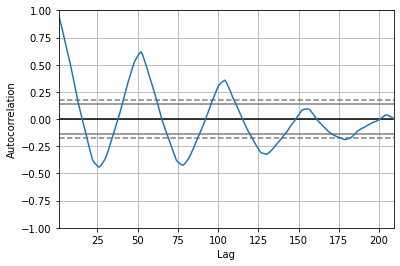

In [57]:
pd.plotting.autocorrelation_plot(cat0.sale_amount)

In [58]:
import statsmodels.api as sm
result = sm.tsa.seasonal_decompose(cat0.sale_amount)

<AxesSubplot:xlabel='sale_date'>

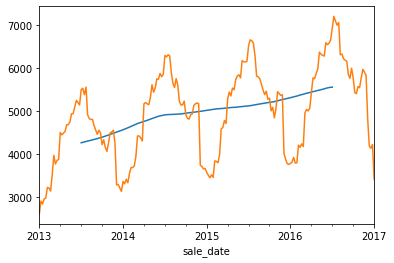

In [59]:
result.trend.plot()
cat0.sale_amount.plot()

[]

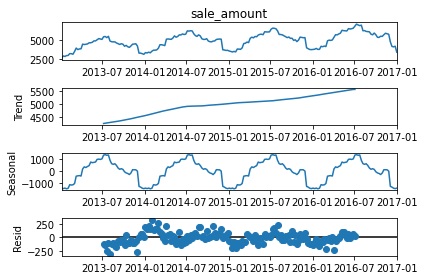

In [61]:
result.plot()
plt.plot()

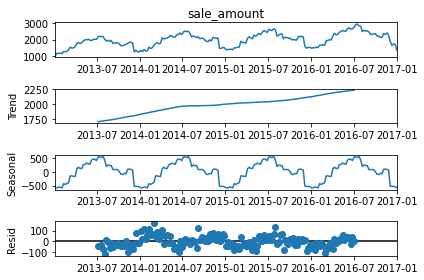

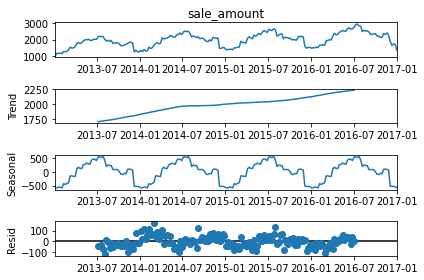

In [62]:
sm.tsa.seasonal_decompose(temp[temp.cat == 1].sale_amount).plot()

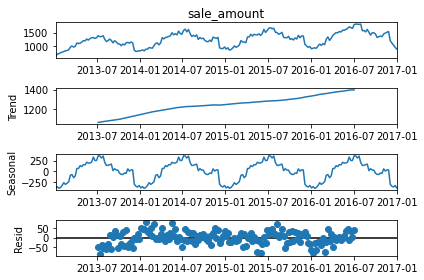

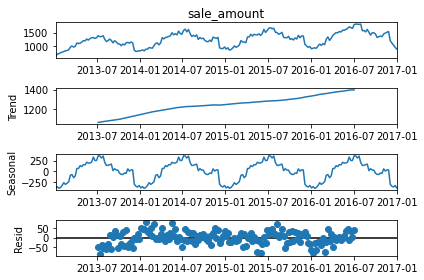

In [63]:
sm.tsa.seasonal_decompose(temp[temp.cat == 2].sale_amount).plot()

#### 3. Resample your data and visualize it.


<AxesSubplot:xlabel='sale_date'>

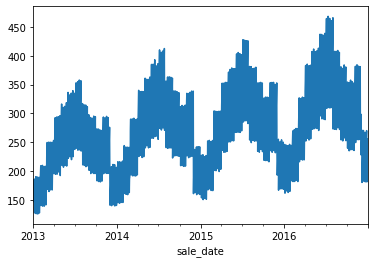

In [64]:
y = train.resample('D').mean().sales_total
y.plot()

#### 4. Creating a rolling (moving) average of your data and visualize it.


<AxesSubplot:xlabel='sale_date'>

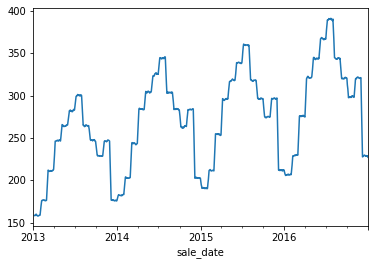

In [65]:
y.rolling(7).mean().plot()

#### 5. Plot the difference in sales from one day to the next.


<AxesSubplot:xlabel='sale_date'>

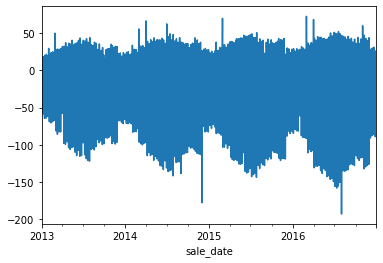

In [66]:
y.diff().plot()

#### 6. Plot the % difference in sales from one day to the next.


<AxesSubplot:xlabel='sale_date'>

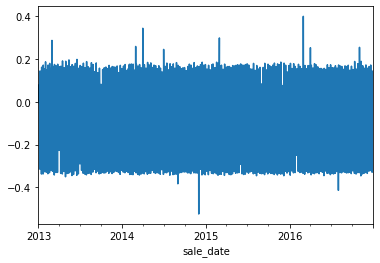

In [67]:
(y.diff() / y.shift()).plot()

#### 6. Plot the % difference in sales from one week to the next.


<AxesSubplot:xlabel='sale_date'>

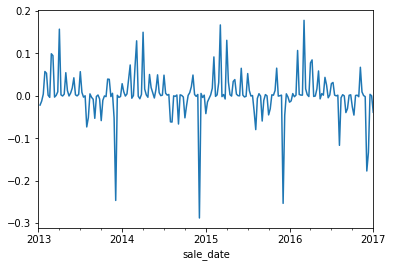

In [68]:
yw = y.resample('W').mean()
(yw.diff() / yw.shift()).plot()

#### 7. Plot the % difference in sales from one month to the next.


<AxesSubplot:xlabel='sale_date'>

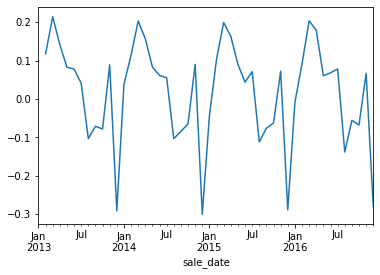

In [69]:
yw = y.resample('M').mean()
(yw.diff() / yw.shift()).plot()

#### 8. Visualize an autocorrelation plot on a weekly resampling.


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

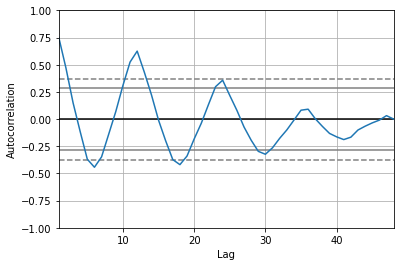

In [70]:
pd.plotting.autocorrelation_plot(yw)

#### 9. Visualize a seasonal decomposition plot on a weekly resampling.



<AxesSubplot:xlabel='sale_date'>

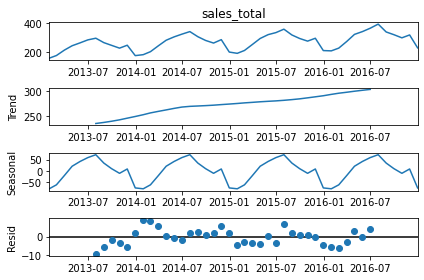

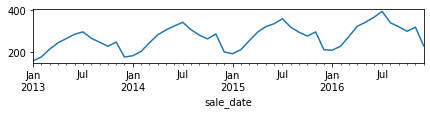

In [71]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(yw).plot()
plt.plot()
plt.figure(figsize=(7,1))
yw.plot()

<AxesSubplot:xlabel='sale_date'>

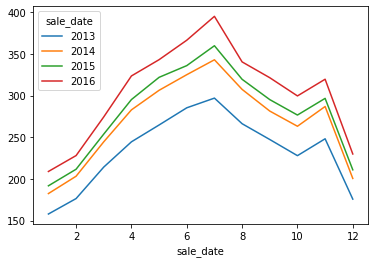

In [72]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()

# Sales by store

In [73]:
df.head()

,item,sale_amount,sale_id,store,item_brand,item_name,item_price,...,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,...,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,1,10.92
2013-01-01,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,...,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,1,218.40
2013-01-01,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,...,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,1,125.55
2013-01-01,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,...,15000 San Pedro Ave,San Antonio,TX,78232,1,1,453.60
2013-01-01,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,...,735 SW Military Dr,San Antonio,TX,78221,1,1,294.00


In [74]:
df['store'] = df.store_address.astype('category').cat.codes

In [82]:
stores = df.store.sort_values().unique().tolist()

In [87]:
df[df.store == 0].resample('D').sum().sale_amount.head()

sale_date
2013-01-01    1099.0
2013-01-02    1023.0
2013-01-03    1149.0
2013-01-04    1201.0
2013-01-05    1286.0
Freq: D, Name: sale_amount, dtype: float64

In [90]:
y = {}
for store in stores:
    y[store] = df[df.store == store].resample('D').sum().sale_amount

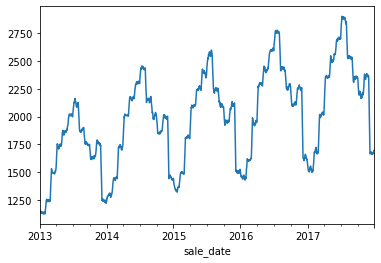

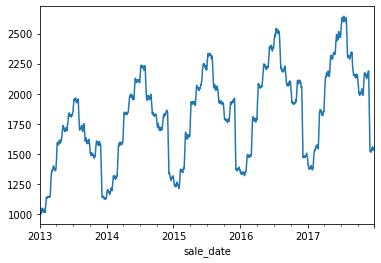

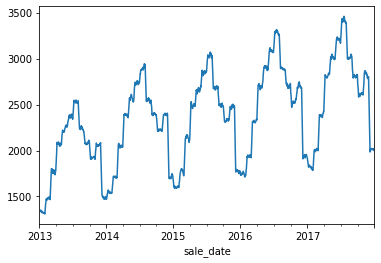

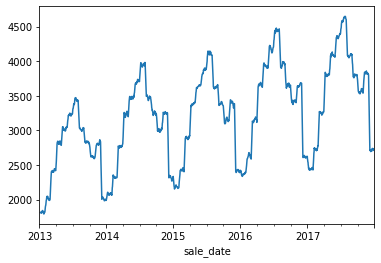

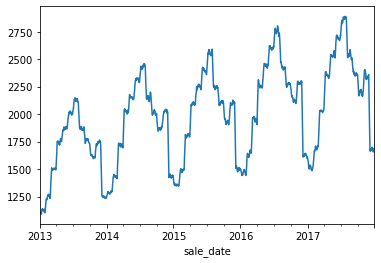

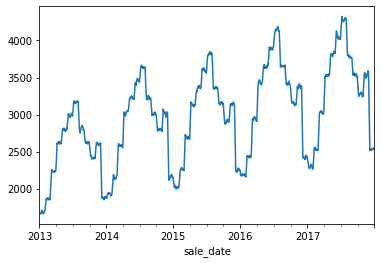

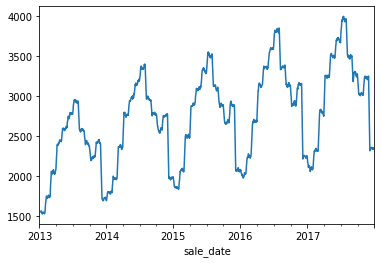

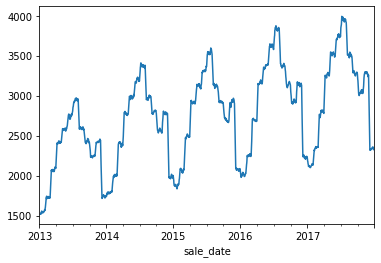

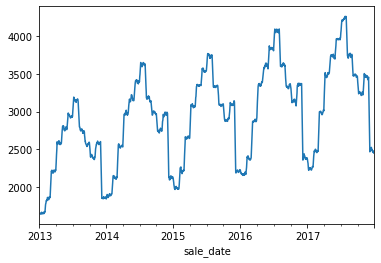

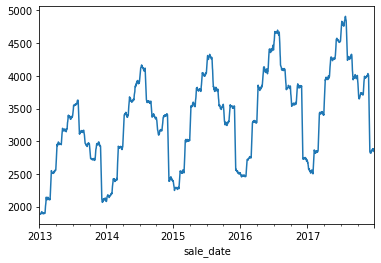

In [93]:
for s in y.values():
    s.rolling(7).mean().plot()
    plt.show()

### OPS data
Load your OPS data using your acquire and/or prepare functions.
1. Split the data, so that train contains information up to and including 2013. The remaning data should be placed in test. 

Only use the train data set to perform the following tasks:

2. Visualize your train-test split.
3. Plot the consumption, wind, and solar data on the same chart.
4. Plot only the consumption data from the year 2010. Are there any patterns you can identify? Note them in a markdown section.
5. Resample the consumption data to monthly and plot it.
6. Resample the consumption data to yearly and plot it.

#### BONUS:
7. Group the consumption data by month and create a boxplot treating the month component as a separate categorical feature.
8. Group the consumption data by weekday and create a boxplot treating the weekday component as a separate categorical feature.
9. Create a subseasonal plot by month of your consumption data. 
10. Create one or two visualizations that helps answer the follow questions: How does wind production/consumption vary within a year? How does wind production/consumption vary from year to year?
11. Create one or two visualizations that helps answer the follow questions: How does solar production/consumption vary within a year? How does solar production/consumption vary from year to year?
12. Plot a time series decomposition for your consumption data and note your takeaways.
13. Create an autocorrelation plot of a weekly resampling of the consumption data.